In [11]:
import numpy as np
import pandas as pd
%pylab inline


import statsmodels.formula.api as smf

Populating the interactive namespace from numpy and matplotlib


In [3]:
day = pd.read_csv('day.csv')

In [4]:
day.shape

(731, 16)

In [5]:
day.head

<bound method NDFrame.head of      instant      dteday  season  yr  mnth  holiday  weekday  workingday  \
0          1  2011-01-01       1   0     1        0        6           0   
1          2  2011-01-02       1   0     1        0        0           0   
2          3  2011-01-03       1   0     1        0        1           1   
3          4  2011-01-04       1   0     1        0        2           1   
4          5  2011-01-05       1   0     1        0        3           1   
..       ...         ...     ...  ..   ...      ...      ...         ...   
726      727  2012-12-27       1   1    12        0        4           1   
727      728  2012-12-28       1   1    12        0        5           1   
728      729  2012-12-29       1   1    12        0        6           0   
729      730  2012-12-30       1   1    12        0        0           0   
730      731  2012-12-31       1   1    12        0        1           1   

     weathersit      temp     atemp       hum  windspeed 

In [6]:
hour = pd.read_csv('hour.csv')

In [7]:
hour.head

<bound method NDFrame.head of        instant      dteday  season  yr  mnth  hr  holiday  weekday  \
0            1  2011-01-01       1   0     1   0        0        6   
1            2  2011-01-01       1   0     1   1        0        6   
2            3  2011-01-01       1   0     1   2        0        6   
3            4  2011-01-01       1   0     1   3        0        6   
4            5  2011-01-01       1   0     1   4        0        6   
...        ...         ...     ...  ..   ...  ..      ...      ...   
17374    17375  2012-12-31       1   1    12  19        0        1   
17375    17376  2012-12-31       1   1    12  20        0        1   
17376    17377  2012-12-31       1   1    12  21        0        1   
17377    17378  2012-12-31       1   1    12  22        0        1   
17378    17379  2012-12-31       1   1    12  23        0        1   

       workingday  weathersit  temp   atemp   hum  windspeed  casual  \
0               0           1  0.24  0.2879  0.81     0.0

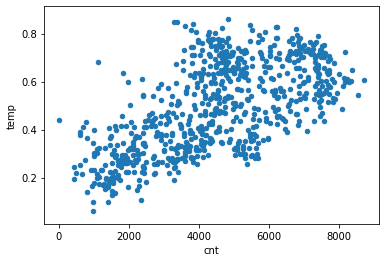

In [9]:
# Single variable regression
day.plot('cnt','temp',kind='scatter')

0.0001 0.0


(0, 10000)

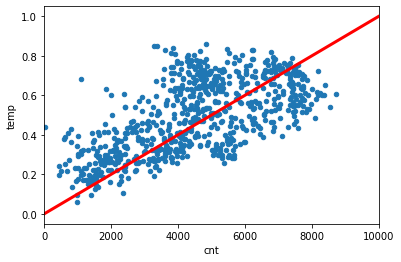

In [16]:
# Make a guess at the line of best fit
first_point = [0,0]
second_point = [10000, 1.0]

# Solve 
def get_line_equation(p1, p2):
    """
    Solve the system of equations:
    y1 = m*x1 + b
    y2 = m*x2 + b
    
    Input:
    p1: first point [x1, y1]
    p2: second point [x2, y2]
    
    returns: slope, intercept
    """
    X = [[p1[0], 1], [p2[0], 1]]
    y = [[p1[1]], [p2[1]]]
    soln = np.linalg.solve(X,y)
    return  soln[0][0], soln[1][0]

slope, intercept = get_line_equation(first_point, second_point)

print(slope, intercept)

# Plot the line along with the data
ax = day.plot('cnt','temp',kind='scatter')
xx = np.linspace(0, 10000, 100)
ax.plot(xx, xx*slope + intercept, color='red', lw=3)
ax.set_xlim([0,10000])

In [16]:
formula = 'cnt ~ season + yr + mnth'

fitted_model = smf.ols(formula=formula, data=day).fit()
fitted_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.498
Model:                            OLS   Adj. R-squared:                  0.496
Method:                 Least Squares   F-statistic:                     240.1
Date:                Tue, 19 Nov 2019   Prob (F-statistic):          3.16e-108
Time:                        11:16:05   Log-Likelihood:                -6318.1
No. Observations:                 731   AIC:                         1.264e+04
Df Residuals:                     727   BIC:                         1.266e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1638.9446    135.316     12.112      0.000    1373.287    1904.602
season       980.2427     82.509     11.880      0.000     818.258    1142.227
yr          2196.8933    101.777     21.585      0.000    1997.082    2396.705
mnth        -104.5731     26.551     -3.939      0.000    -156.699     -52.447
==============================================================================
Omnibus:                       36.432   Durbin-Watson:                   0.623
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               42.589
Skew:                          -0.509   Prob(JB):                     5.65e-10
Kurtosis:                       3.603   Cond. No.                         23.2
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [17]:
formula = 'cnt ~ C(season) + C(yr) + C(mnth)'

fitted_model = smf.ols(formula=formula, data=day).fit()
fitted_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.738
Model:                            OLS   Adj. R-squared:                  0.733
Method:                 Least Squares   F-statistic:                     134.3
Date:                Tue, 19 Nov 2019   Prob (F-statistic):          3.25e-196
Time:                        11:32:28   Log-Likelihood:                -6080.1
No. Observations:                 731   AIC:                         1.219e+04
Df Residuals:                     715   BIC:                         1.227e+04
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept       1076.6985    132.519      8.125      0.000     816.527    1336.870
C(season)[T.2]   747.9328    232.741      3.214      0.001     290.994    1204.871
C(season)[T.3]  1117.7702    274.723      4.069      0.000     578.410    1657.131
C(season)[T.4]  1894.8922    232.741      8.142      0.000    1437.954    2351.831
C(yr)[T.1]      2199.2804     74.109     29.676      0.000    2053.783    2344.778
C(mnth)[T.2]     459.6676    183.839      2.500      0.013      98.739     820.596
C(mnth)[T.3]    1250.5238    197.981      6.316      0.000     861.829    1639.218
C(mnth)[T.4]    1560.6285    295.101      5.288      0.000     981.261    2139.996
C(mnth)[T.5]    2425.5027    294.185      8.245      0.000    1847.933    3003.072
C(mnth)[T.6]    2724.8160    285.700      9.537      0.000    2163.906    3285.726
C(mnth)[T.7]    2269.5685    328.404      6.911      0.000    1624.818    2914.319
C(mnth)[T.8]    2370.3105    328.404      7.218      0.000    1725.560    3015.061
C(mnth)[T.9]    2265.1752    301.188      7.521      0.000    1673.857    2856.493
C(mnth)[T.10]   1127.9949    294.185      3.834      0.000     550.425    1705.565
C(mnth)[T.11]    175.9524    295.101      0.596      0.551    -403.415     755.320
C(mnth)[T.12]      4.9567    234.357      0.021      0.983    -455.153     465.066
==============================================================================
Omnibus:                      191.987   Durbin-Watson:                   1.175
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              700.598
Skew:                          -1.202   Prob(JB):                    7.36e-153
Kurtosis:                       7.150   Cond. No.                         26.6
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

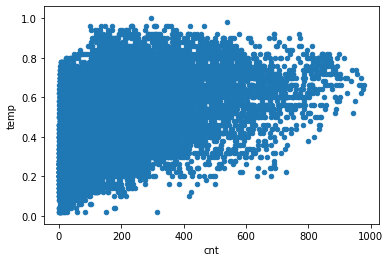

In [21]:
# Single variable regression
hour.plot('cnt','temp',kind='scatter')

In [18]:
formula = 'cnt ~ season + yr + mnth'

fitted_model = smf.ols(formula=formula, data=hour).fit()
fitted_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.098
Model:                            OLS   Adj. R-squared:                  0.098
Method:                 Least Squares   F-statistic:                     627.4
Date:                Tue, 19 Nov 2019   Prob (F-statistic):               0.00
Time:                        13:29:24   Log-Likelihood:            -1.1415e+05
No. Observations:               17379   AIC:                         2.283e+05
Df Residuals:                   17375   BIC:                         2.283e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     69.7465      3.500     19.928      0.000      62.886      76.607
season        41.3791      2.119     19.525      0.000      37.225      45.533
yr            91.5277      2.614     35.010      0.000      86.403      96.652
mnth          -4.5577      0.682     -6.681      0.000      -5.895      -3.221
==============================================================================
Omnibus:                     2505.288   Durbin-Watson:                   0.346
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3848.756
Skew:                           1.031   Prob(JB):                         0.00
Kurtosis:                       4.033   Cond. No.                         23.4
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [28]:
formula = 'cnt ~ C(season) + C(yr) + C(mnth) + C(holiday) + C(weekday) + C(workingday) + C(weathersit)'

fitted_model = smf.ols(formula=formula, data=day).fit()
fitted_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.813
Model:                            OLS   Adj. R-squared:                  0.806
Method:                 Least Squares   F-statistic:                     127.7
Date:                Tue, 19 Nov 2019   Prob (F-statistic):          4.30e-238
Time:                        13:33:34   Log-Likelihood:                -5957.2
No. Observations:                 731   AIC:                         1.196e+04
Df Residuals:                     706   BIC:                         1.208e+04
Df Model:                          24                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept           1094.1721    137.808      7.940      0.000     823.609    1364.735
C(season)[T.2]       903.6882    198.420      4.554      0.000     514.124    1293.253
C(season)[T.3]      1152.8474    234.163      4.923      0.000     693.109    1612.586
C(season)[T.4]      1851.9846    198.749      9.318      0.000    1461.774    2242.195
C(yr)[T.1]          2135.1007     63.232     33.766      0.000    2010.956    2259.245
C(mnth)[T.2]         402.7794    156.500      2.574      0.010      95.517     710.041
C(mnth)[T.3]        1189.3042    168.717      7.049      0.000     858.057    1520.551
C(mnth)[T.4]        1406.0764    251.428      5.592      0.000     912.441    1899.712
C(mnth)[T.5]        2220.3564    250.650      8.858      0.000    1728.247    2712.466
C(mnth)[T.6]        2411.0551    243.998      9.881      0.000    1932.006    2890.104
C(mnth)[T.7]        2060.2300    280.035      7.357      0.000    1510.429    2610.030
C(mnth)[T.8]        2190.9188    279.845      7.829      0.000    1641.491    2740.347
C(mnth)[T.9]        2327.2374    256.484      9.074      0.000    1823.675    2830.800
C(mnth)[T.10]       1335.3481    251.093      5.318      0.000     842.370    1828.327
C(mnth)[T.11]        196.8944    252.280      0.780      0.435    -298.414     692.202
C(mnth)[T.12]        130.3107    199.783      0.652      0.514    -261.929     522.551
C(holiday)[T.1]     -113.5181    177.160     -0.641      0.522    -461.342     234.306
C(weekday)[T.1]     -125.7873     79.114     -1.590      0.112    -281.114      29.539
C(weekday)[T.2]       20.0729     85.496      0.235      0.814    -147.783     187.929
C(weekday)[T.3]      100.9335     85.785      1.177      0.240     -67.491     269.357
C(weekday)[T.4]      131.1409     84.803      1.546      0.122     -35.354     297.636
C(weekday)[T.5]      137.6842     85.041      1.619      0.106     -29.278     304.647
C(weekday)[T.6]      455.9144    117.864      3.868      0.000     224.509     687.320
C(workingday)[T.1]   377.5624     73.868      5.111      0.000     232.535     522.590
C(weathersit)[T.2]  -717.8321     68.630    -10.460      0.000    -852.575    -583.090
C(weathersit)[T.3] -2611.8422    194.900    -13.401      0.000   -2994.495   -2229.190
==============================================================================
Omnibus:                      124.638   Durbin-Watson:                   1.181
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              496.421
Skew:                          -0.739   Prob(JB):                    1.60e-108
Kurtosis:                       6.756   Cond. No.                     6.87e+15
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is corr